# Testing Trained Models on Simulation'

After training, use this model to load the trained AI and run simulations with loaded AI. Loaded AI will kick out any robots it deems as byzantine throughout the run.

In [1]:
# Import modules
import os
import json
import random
import numpy as np
import torch
import joblib
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from Classes import Controller, Robot
from Utils import pbft_majority_consensus, setup_simulation

In [2]:
# --- Batch Run Variables ---
NUM_RUNS = 10 
FIELD_WIDTH = 100
FIELD_HEIGHT = 100
TOKENS_PER_RUN = 200
ROBOTS_PER_RUN = 25
SIM_DURATION_SECONDS = 2000
COMM_INTERVAL = 5 # Seconds between each signal sent between Robot & Controller
RANDOMIZE = True # Whether robot starting positions are random in the field
MOVEMENT_RANGE = 10 # Range of movement in cardinal directions (10 represents 5 in each direction)
SCAN_RANGE = 5 # Scan range - direct value. All tokens within SCAN_RANGE units can be seen

PERCENT_BYZANTINE = 0.2  

In [3]:
# Set up environment
tokens, robots = setup_simulation(FIELD_WIDTH, FIELD_HEIGHT, TOKENS_PER_RUN, ROBOTS_PER_RUN, RANDOMIZE, MOVEMENT_RANGE, SCAN_RANGE, PERCENT_BYZANTINE)

# Define consensus algorithm being used
consensus_algorithm = pbft_majority_consensus

# Create a new Controller for each run
controller = Controller(robots, SIM_DURATION_SECONDS, COMM_INTERVAL, consensus_algorithm, include_AI=True)
controller.load_model("lstm", "./lstm_model.pth", 5)
#controller.load_model("random_forest", "./random_forest_model.pkl")

# Attach token list to robots
for robot in robots:
    robot.token_list = tokens 

final_tokens, detected_byzantines = controller.run()

print(f"\nSimulation complete!")

/home/isaiah_wang/Workspace/SwarmGuard/testClass.py:159: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /pytorch/torch/csrc/utils/tensor_new.cpp:254.)
  features_batch = torch.tensor(features_batch, dtype=torch.float32)



Simulation complete!


In [7]:
print(f"Detected and deactivated {len(detected_byzantines)} robots.")
for robot_id, is_actual_byzantine in detected_byzantines.items():
    print(f"Robot {robot_id} removed. Actually Byzantine: {bool(is_actual_byzantine)}")

Detected and deactivated 23 robots.
Robot robot_0_9814 removed. Actually Byzantine: False
Robot robot_2_3477 removed. Actually Byzantine: True
Robot robot_3_8124 removed. Actually Byzantine: False
Robot robot_4_2482 removed. Actually Byzantine: False
Robot robot_5_7388 removed. Actually Byzantine: True
Robot robot_6_3003 removed. Actually Byzantine: False
Robot robot_7_4403 removed. Actually Byzantine: False
Robot robot_8_2210 removed. Actually Byzantine: False
Robot robot_9_2805 removed. Actually Byzantine: True
Robot robot_10_5254 removed. Actually Byzantine: False
Robot robot_11_4434 removed. Actually Byzantine: False
Robot robot_13_7433 removed. Actually Byzantine: False
Robot robot_14_9334 removed. Actually Byzantine: False
Robot robot_15_6719 removed. Actually Byzantine: False
Robot robot_16_8695 removed. Actually Byzantine: False
Robot robot_17_1305 removed. Actually Byzantine: False
Robot robot_18_3990 removed. Actually Byzantine: False
Robot robot_19_3657 removed. Actually Byz

In [5]:
# --- Show final detected tokens ---
collected_tokens = []
for robot in robots:
    collected_tokens.extend(robot.found_tokens)

# Remove duplicates
collected_tokens = np.array([tuple(np.round(token, 1)) for token in collected_tokens])
collected_tokens = np.unique(collected_tokens, axis=0)

real_tokens = np.array([tuple(np.round(token, 1)) for token in tokens])
real_tokens = np.unique(real_tokens, axis=0)

print(f"\nActual number of tokens in field: {len(real_tokens)}")
print(f"Number of tokens detected by swarm: {len(collected_tokens)}")


Actual number of tokens in field: 200
Number of tokens detected by swarm: 199


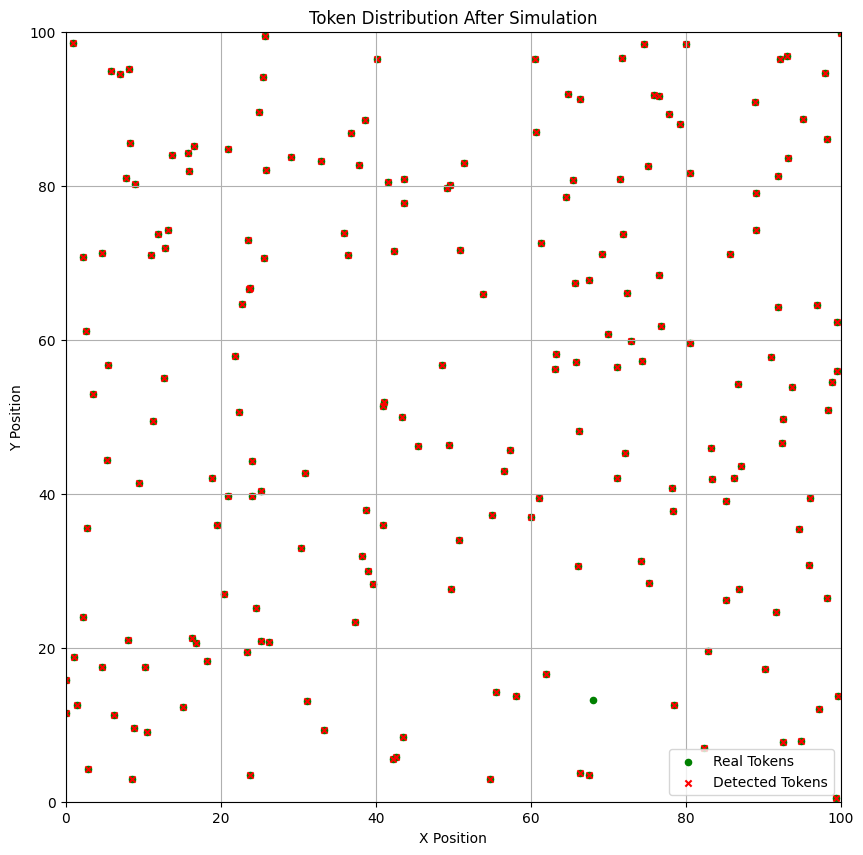

In [6]:
# --- Visualization ---
plt.figure(figsize=(10, 10))
plt.scatter(real_tokens[:, 0], real_tokens[:, 1], c='green', label='Real Tokens', s=20)
if len(collected_tokens) > 0:
    plt.scatter(collected_tokens[:, 0], collected_tokens[:, 1], c='red', marker='x', label='Detected Tokens', s=20)
plt.title('Token Distribution After Simulation')
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.legend()
plt.grid(True)
plt.xlim(0, FIELD_WIDTH)
plt.ylim(0, FIELD_HEIGHT)
plt.show()